# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#for randomized data splitting
from sklearn.model_selection import train_test_split

#to build linear regression model
import statsmodels.api as sm

#to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

In [2]:
# loading the dataset
df = pd.read_csv("used_device_data.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

There are 3454 rows and 15 columns.


## Data Overview

- Observations
- Sanity checks

In [3]:
# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=15)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


#### * There are 9 float columns, 2 integer columns, and 4 object columns in the dataframe

In [5]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      179
weight                7
battery               6
int_memory            4
ram                   4
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

* main_camera_mp, or resolution of the rear camera in megapixels, has 179 missing values
* weight, or weight of the device in grams, has 7 missing values
* int_memory, or amount of internal memory (ROM) in GB, has 4 missing values
* ram, or amount of RAM in GB, has 4 missing values
* selfie_camera_mp, or resolution of the front camera in megapixels, has 2 missing values 

In [6]:
# checking for duplicate values in the data
df.duplicated().sum()

0

* There are zero duplicate values in the data

In [7]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


#### Observations
* The average price of a used/refurbished device is approximately 92,30 euros
* Android is the most frequent OS in the dataset 
* The average price of a new device is approximately 237,04 euros

In [8]:
#change object variables to category
cat_vars = ['brand_name','os','4g', '5g'] 

for colname in cat_vars:
    df[colname] = df[colname].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3450 non-null   float64 
 8   ram               3450 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 312.2 KB


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

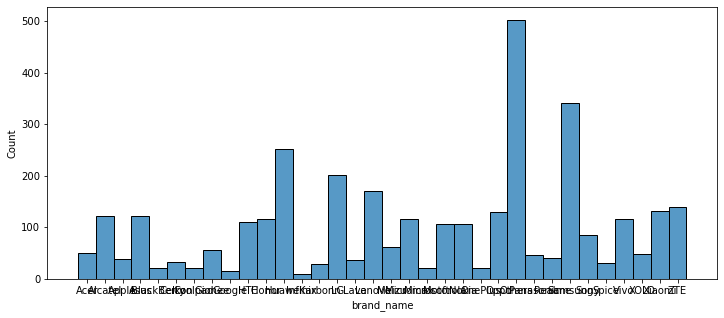

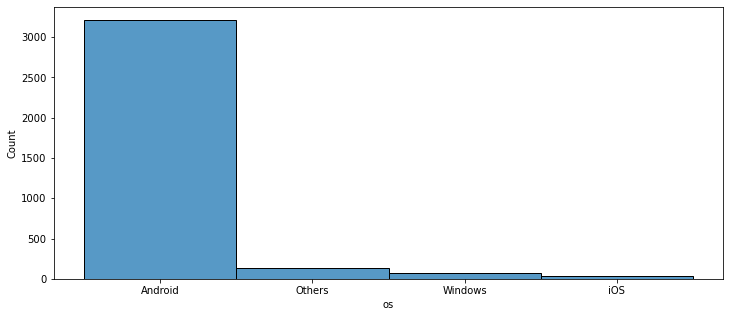

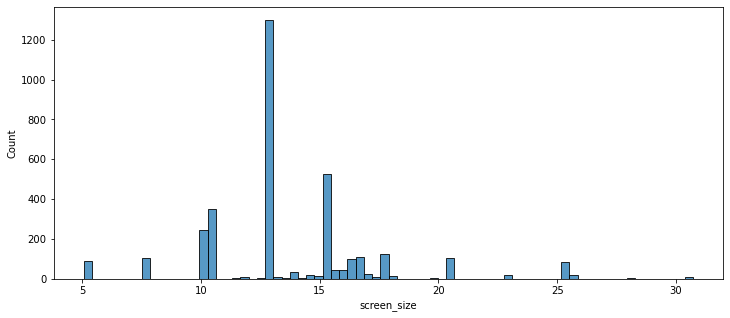

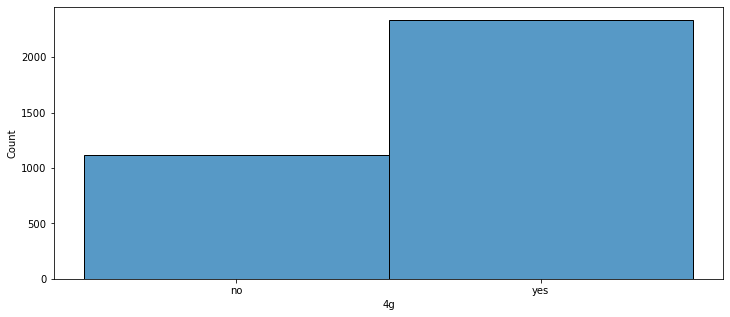

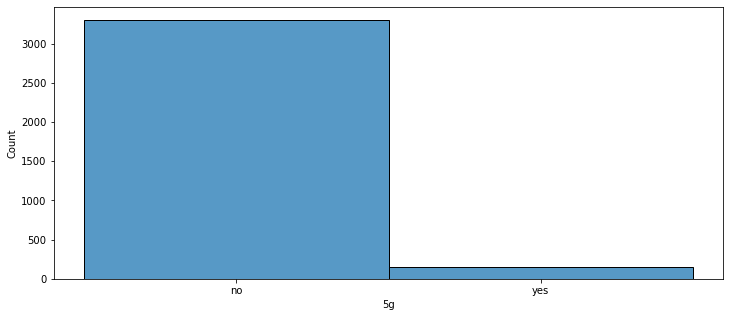

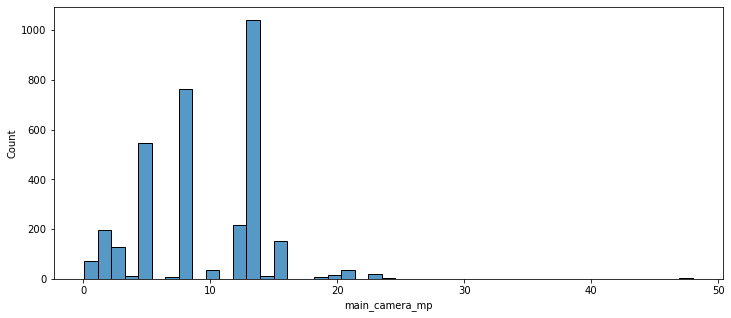

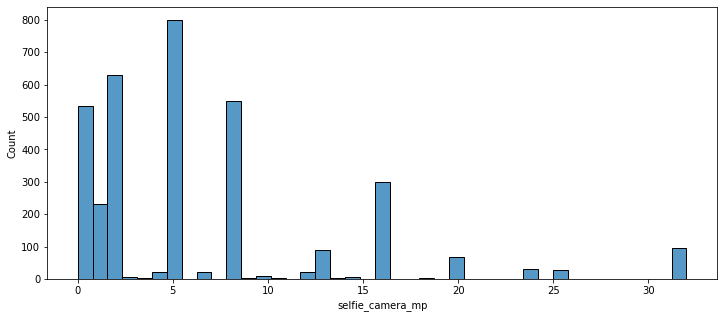

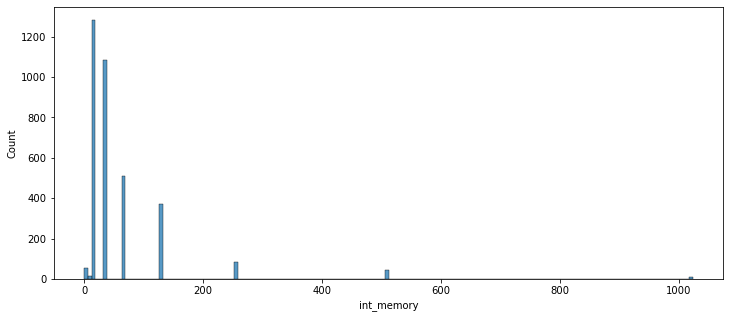

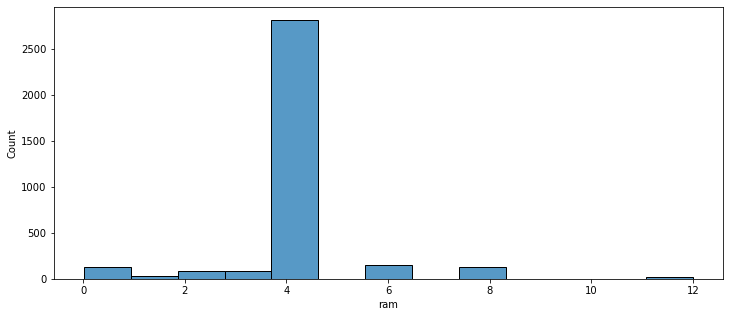

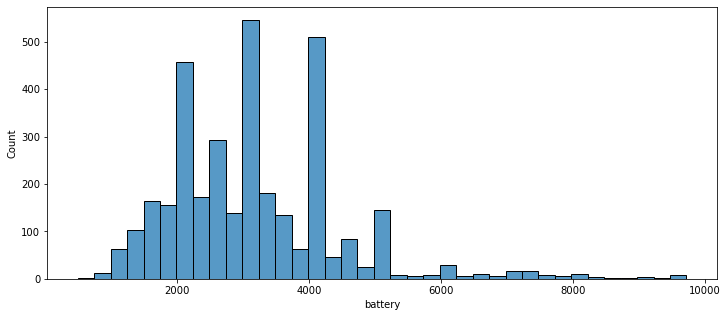

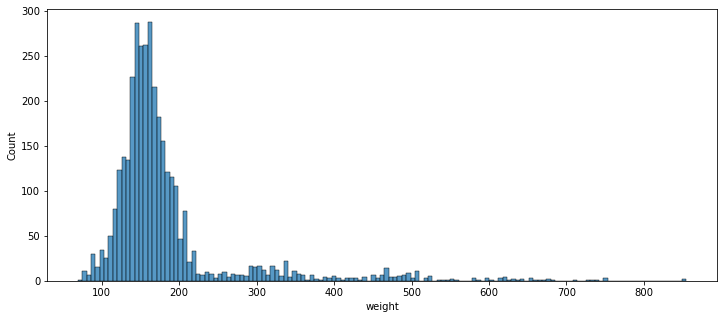

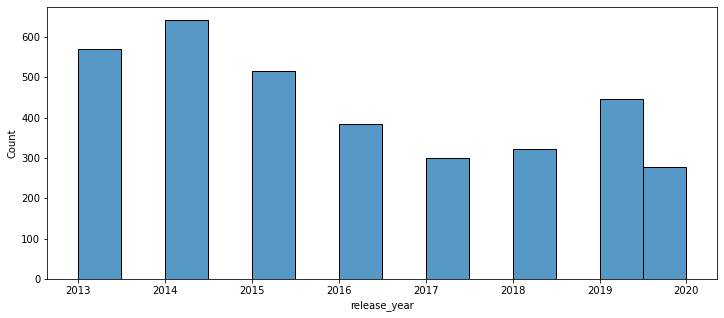

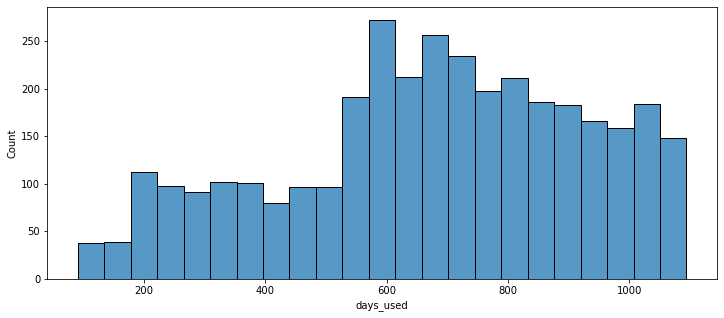

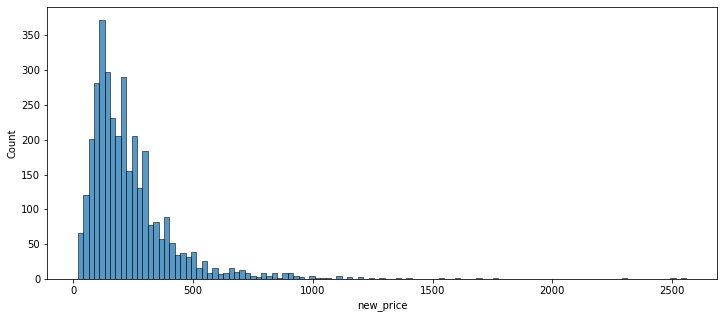

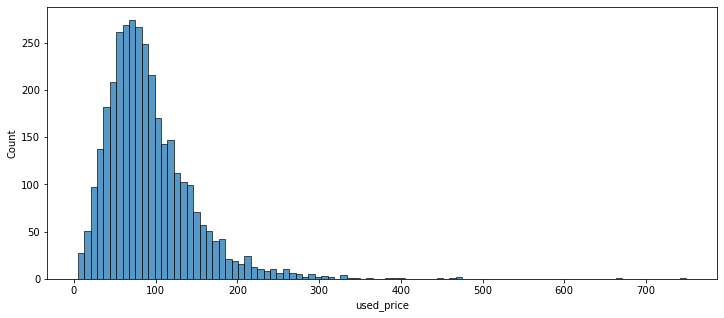

In [9]:
for i in df.columns:
    plt.figure(figsize=(12,5))
    sns.histplot(data=df, x=i)
    plt.show()

In [10]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#### Used Price

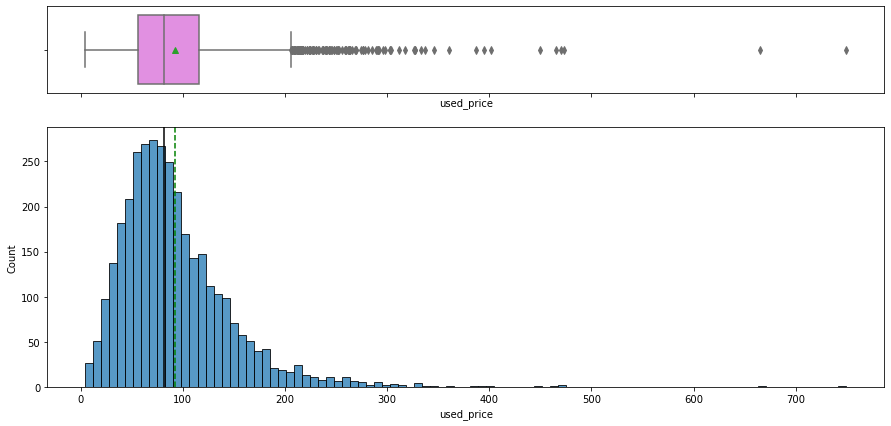

In [12]:
histogram_boxplot(df, "used_price")

In [13]:
df['used_price'].median()

81.87

#### Observations
* The distribution is right-skewed
* The median used price is around 81,87 euros 
* The mean used price is 92,3 euros 

#### New Price

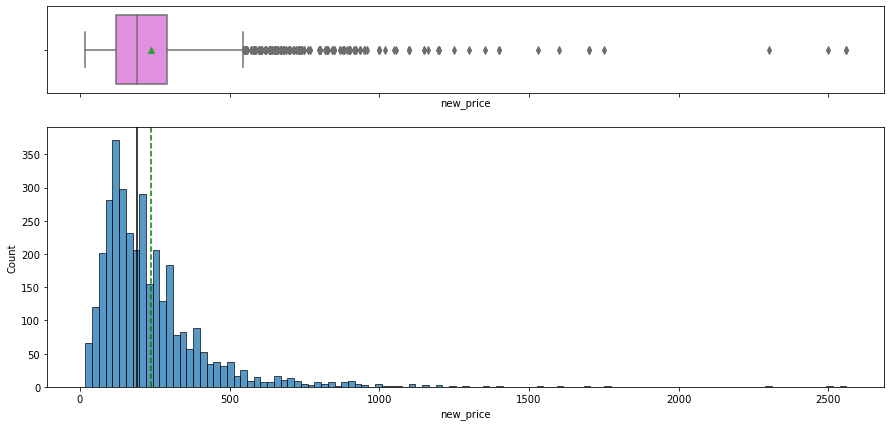

In [14]:
histogram_boxplot(df, "new_price")

In [15]:
df['new_price'].median()

189.78500000000003

#### Observations
* The distribution is right-skewed
* The median new price is 189,79 euros
* The mean new price is 237,03 euros 

#### Days Used

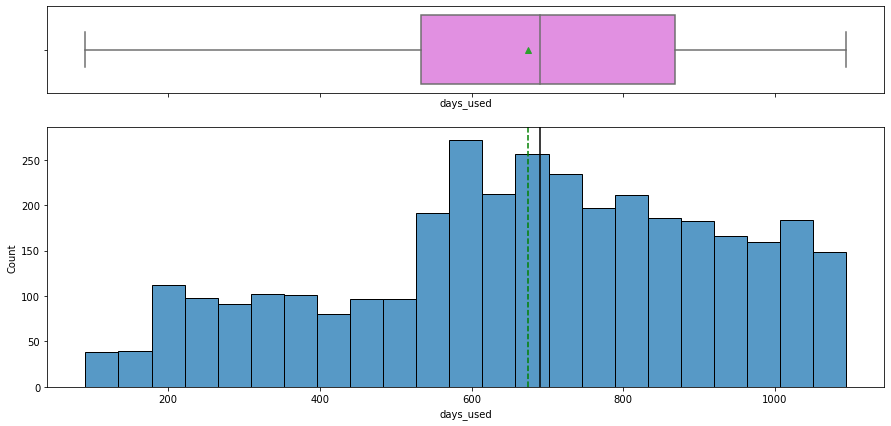

In [16]:
histogram_boxplot(df, "days_used")

In [17]:
df['days_used'].median()

690.5

#### Observations
* The distribution is right-skewed
* The median days used is 690.5 days
* The mean days used is 674.87

#### Release Year

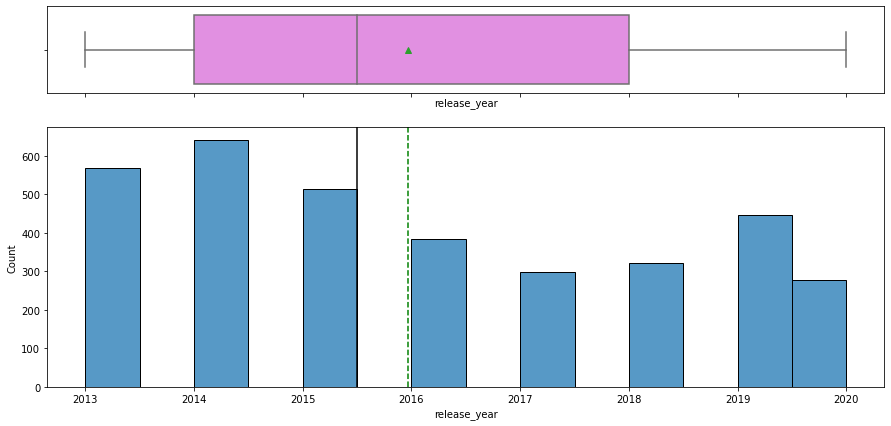

In [18]:
histogram_boxplot(df, "release_year")

In [19]:
df['release_year'].median()

2015.5

#### Observations 
* The median release year is approximately 2015
* The mean release year is approximately 2016

<Figure size 1080x504 with 0 Axes>

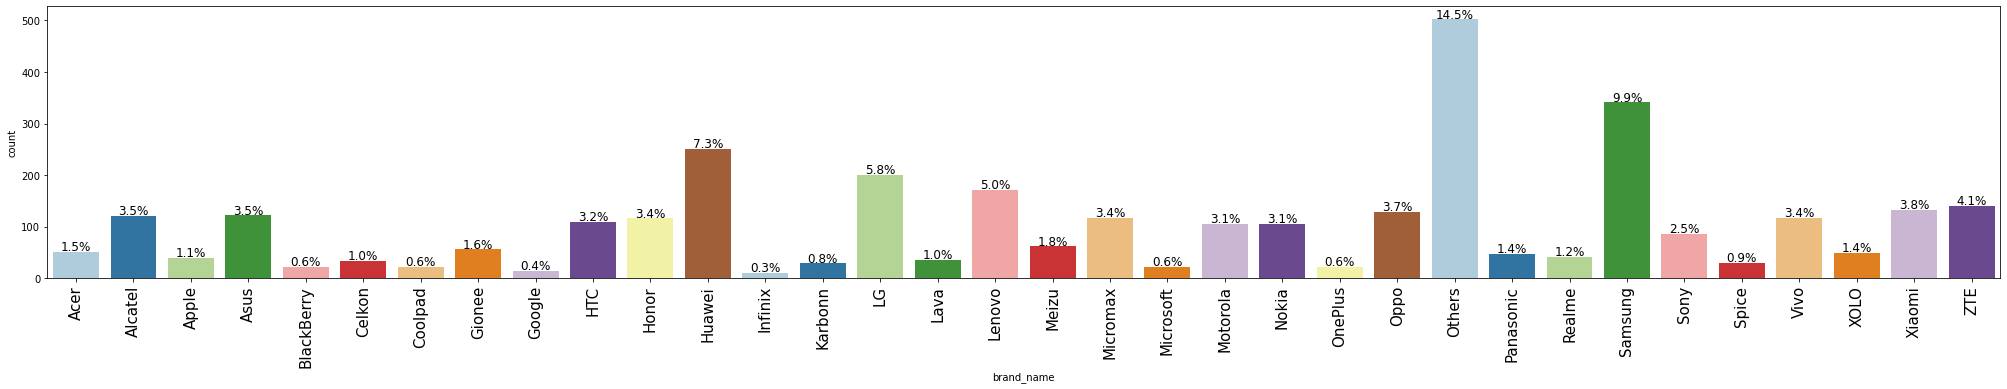

In [20]:
plt.figure(figsize=(15,7))
labeled_barplot(df, 'brand_name', perc=True)

* There are 34 brands within the dataset
* 14.5% of brands fall under "Others"
* 9.9% of brands are samsung 

#### 4G

<Figure size 1080x504 with 0 Axes>

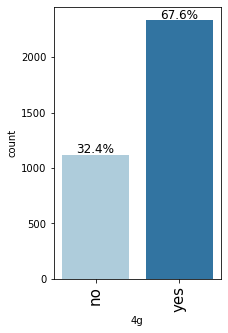

In [21]:
plt.figure(figsize=(15,7))
labeled_barplot(df, '4g', perc=True)

#### Observations 
* 67.6% of 4G is available
* 32.4% of 4G is not available 

#### 5G

<Figure size 1080x504 with 0 Axes>

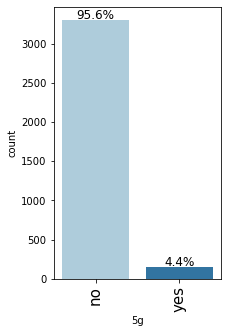

In [22]:
plt.figure(figsize=(15,7))
labeled_barplot(df, '5g', perc=True)

#### Observations
* 4.4% of 5G is available
* 95.6% of 5G is not available 

#### OS

<Figure size 1080x504 with 0 Axes>

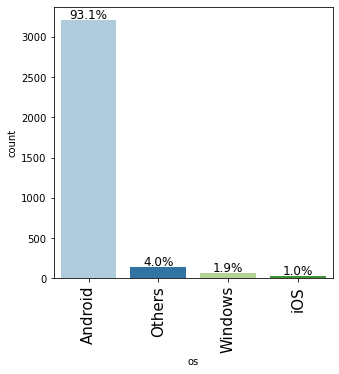

In [23]:
plt.figure(figsize=(15,7))
labeled_barplot(df, 'os', perc=True)

#### Observations
* 93.1% of devices run on Android
* 4.0% of devices run on other OS 
* 1.9% of devices run on Windows
* 1.0% of devices run on iOS

### Bivariate Analysis 

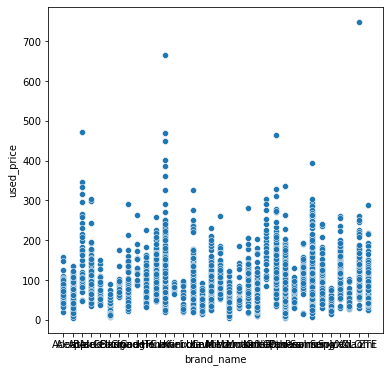

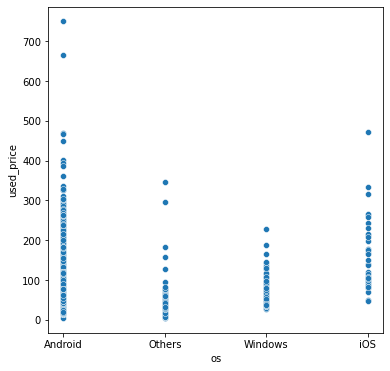

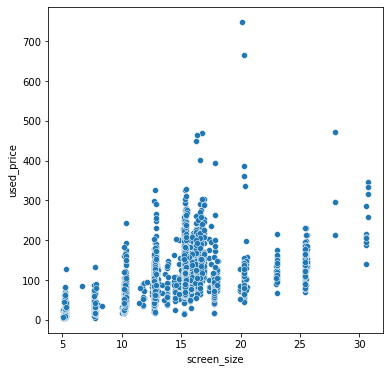

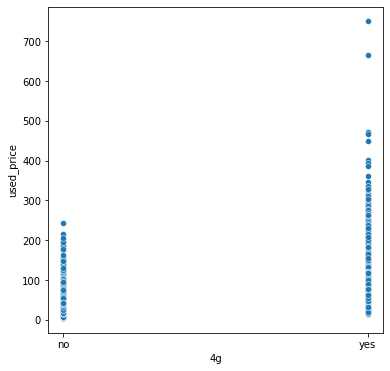

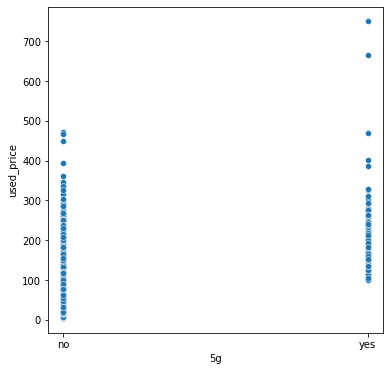

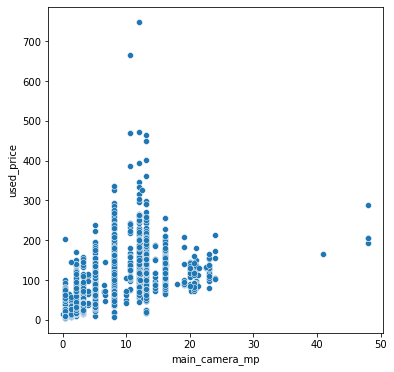

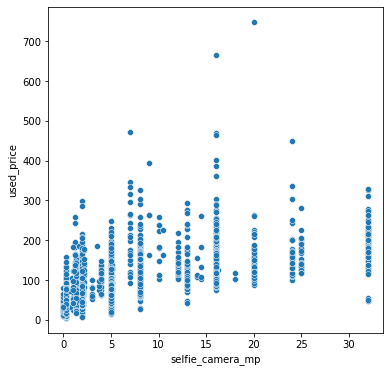

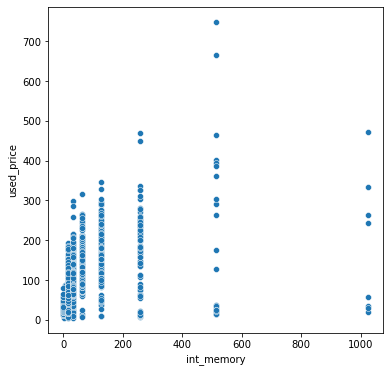

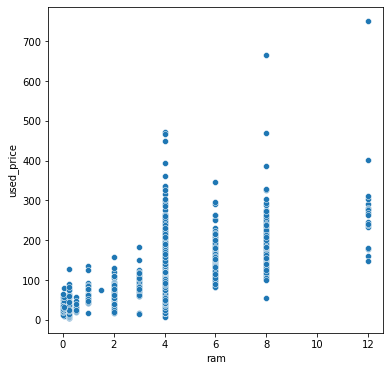

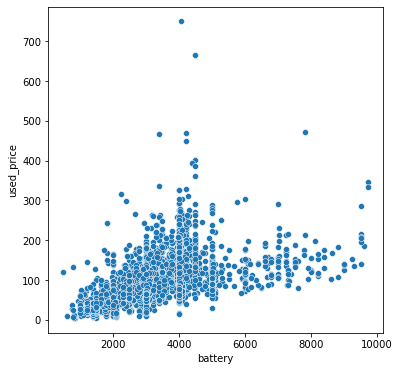

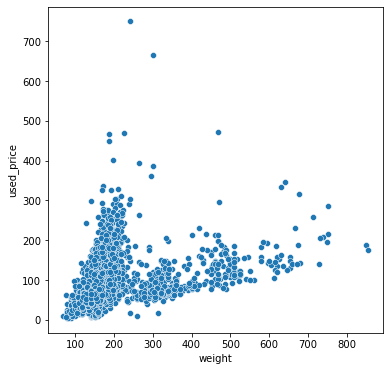

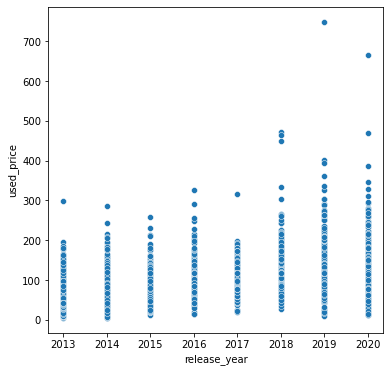

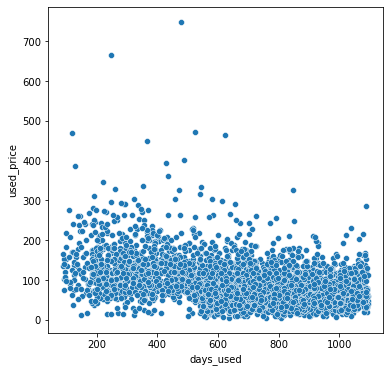

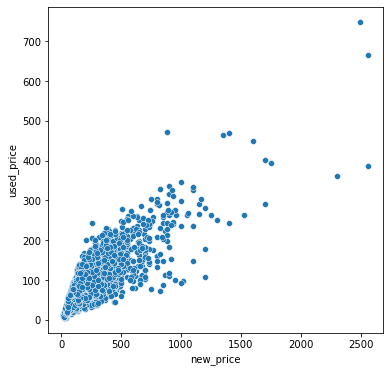

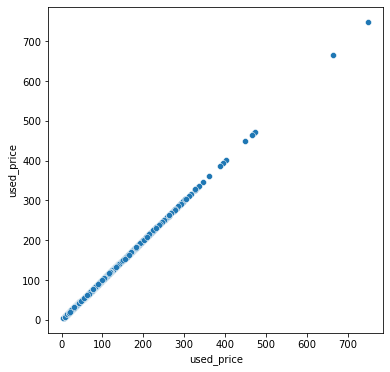

In [24]:
for i in df.columns:
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=df, x=i, y="used_price")
    plt.show()

In [25]:
#correlation of all attributes with used price
df[df.columns[:]].corr()["used_price"][:]

screen_size         0.529275
main_camera_mp      0.459209
selfie_camera_mp    0.614675
int_memory          0.378347
ram                 0.529434
battery             0.549647
weight              0.357983
release_year        0.494910
days_used          -0.385777
new_price           0.809335
used_price          1.000000
Name: used_price, dtype: float64

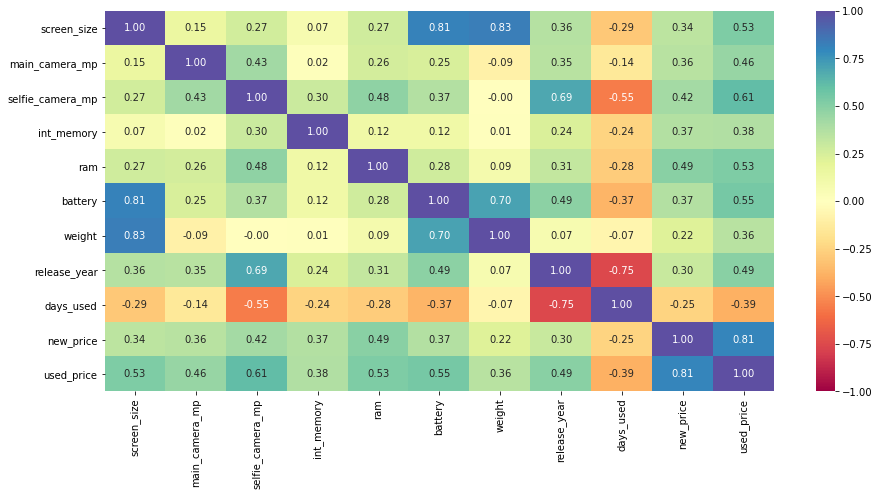

In [26]:
#correlation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(
    df.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

#### Observations
* Screen size is highly positively correlated with battery and weight 
* Release year is positively correlated with selfie camera mp 
* days used is highly negalively correlated with release year 

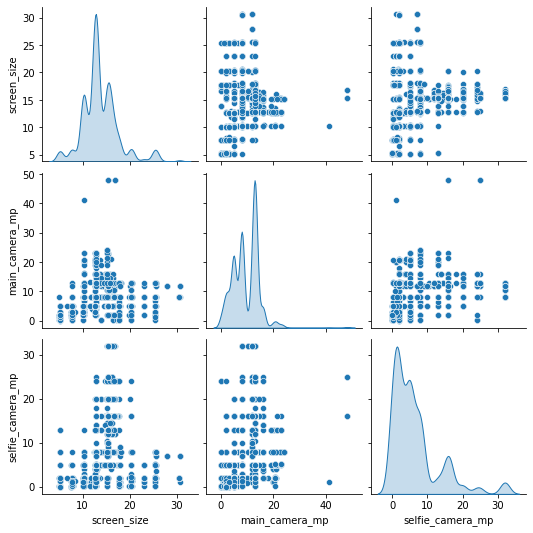

In [27]:
df_attr = df.iloc[:, 0:7]
sns.pairplot(
    df_attr, diag_kind="kde"
)

* Several assumptions of classical linear regression seem to be violated 

In [28]:
# question 2: What percentage of the used device market is dominated by Android devices?
df[df["os"]=="Android"].describe(include="all")

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3214,3214,3214.000000,3214,3214,3035.000000,3212.000000,3214.000000,3214.000000,3211.000000,3208.000000,3214.000000,3214.000000,3214.000000,3214.000000
unique,32,1,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,465,3214,NaN,2239,3062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.982054,NaN,NaN,9.767529,6.886270,54.349225,4.128189,3198.318281,184.040056,2016.052271,669.704729,240.165389,94.224664
std,NaN,NaN,3.464719,NaN,NaN,4.644833,7.082442,82.078229,1.279651,1246.931207,85.768241,2.292847,250.368281,190.310543,53.057530
min,NaN,NaN,5.180000,NaN,NaN,0.300000,0.300000,0.010000,0.250000,500.000000,75.000000,2013.000000,91.000000,30.810000,4.820000
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2270.000000,143.500000,2014.000000,516.000000,128.635000,59.385000
50%,NaN,NaN,12.830000,NaN,NaN,8.100000,5.000000,32.000000,4.000000,3000.000000,161.000000,2016.000000,684.000000,198.500000,83.440000
75%,NaN,NaN,15.370000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,866.000000,291.717500,117.710000


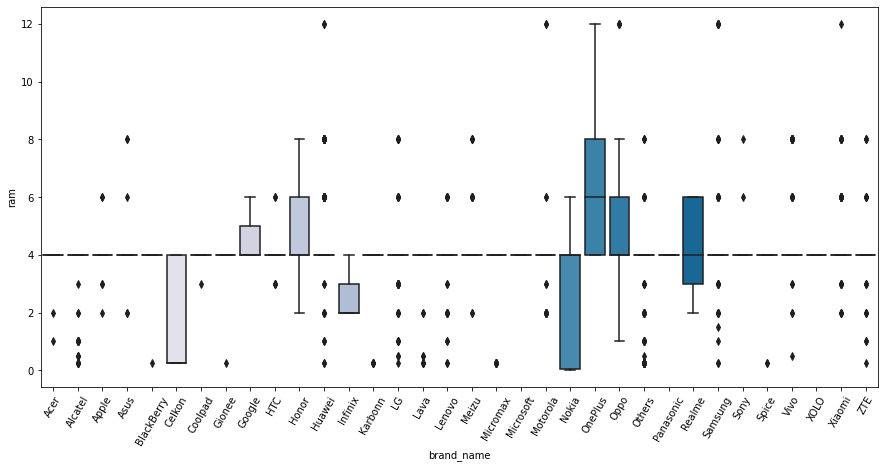

In [32]:
#question 3: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
# Relationship between RAM time and brand
plt.figure(figsize=(15,7))
sns.boxplot(x = "brand_name", y = "ram", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations
* The RAM for BlackBerry and Nokia is close to 0
* OnePlus has the highest RAM 
* HTC, Oppo, and Realme have very close RAMs, approximately equal

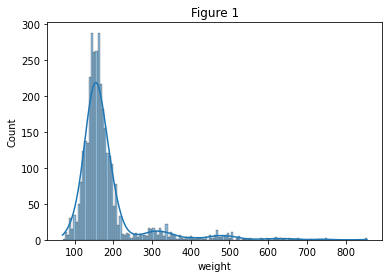

In [63]:
# question 4: A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
sns.histplot(df['weight'], kde=True)
plt.title("Figure 1")
plt.show()

In [49]:
# question 5: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
more_than_6 = df[df['screen_size']>6]
more_than_6.count()

brand_name          3362
os                  3362
screen_size         3362
4g                  3362
5g                  3362
main_camera_mp      3183
selfie_camera_mp    3360
int_memory          3361
ram                 3361
battery             3358
weight              3355
release_year        3362
days_used           3362
new_price           3362
used_price          3362
dtype: int64

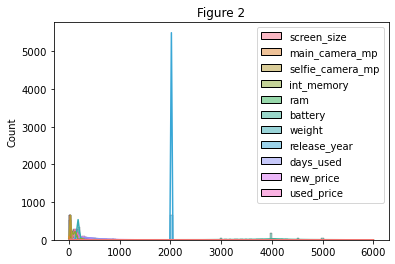

In [64]:
# question 6: Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
sns.histplot(df[df['selfie_camera_mp']>8], kde=True)
plt.title("Figure 2")
plt.show()

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

#### Answers:
1. Used prices looks to be right-skewed.
2. 93.1% of the used device market is dominated by Android.
3. The RAM for BlackBerry and Nokia is close to 0. OnePlus has the highest RAM. HTC, Oppo, and Realme have approximately equal RAMs. 
4. See figure 1/
5. 3,362 phones and tablets are available across different brands with a screen size larger than 6 inches.  
6. See figure 2.
7. Used price

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [65]:
# counting the number of missing values per row
df.isnull().sum(axis=1).value_counts()

0    3253
1     200
2       1
dtype: int64

In [66]:
#checking median values
df.median()

screen_size           12.830
main_camera_mp         8.000
selfie_camera_mp       5.000
int_memory            32.000
ram                    4.000
battery             3000.000
weight               160.000
release_year        2015.500
days_used            690.500
new_price            189.785
used_price            81.870
dtype: float64

In [67]:
#dummy variables
df = pd.get_dummies(df, columns = ["4g", "5g"], drop_first=True)
df.head()

,brand_name,os,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,4g_yes,5g_yes
0,Honor,Android,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26,1,0
1,Honor,Android,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53,1,1
2,Honor,Android,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85,1,1
3,Honor,Android,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93,1,1
4,Honor,Android,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64,1,0


In [68]:
df = df.drop(["os", "brand_name"], axis=1)

In [69]:
medianFiller = lambda x: x.fillna(x.median())
df = df.apply(medianFiller, axis=0)

In [70]:
# looking at which columns have the most missing values
df.isnull().sum()

screen_size         0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
4g_yes              0
5g_yes              0
dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

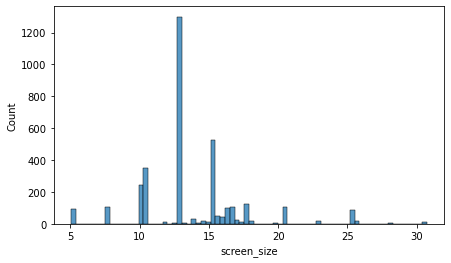

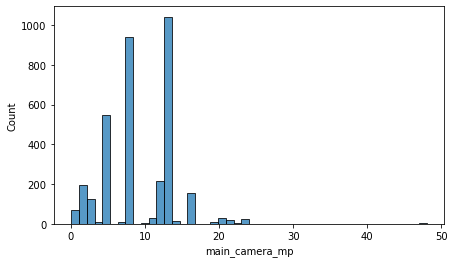

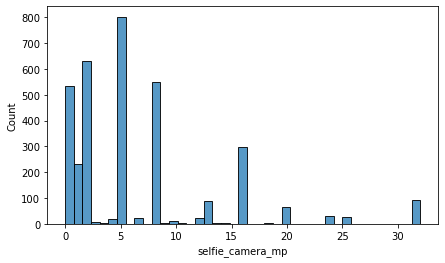

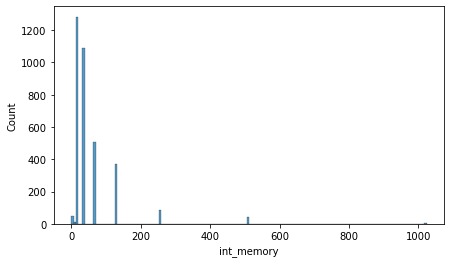

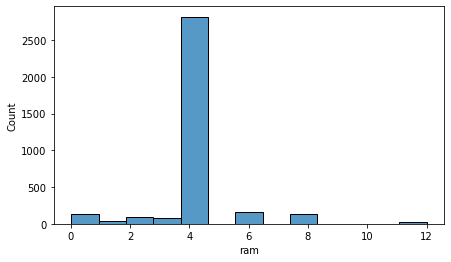

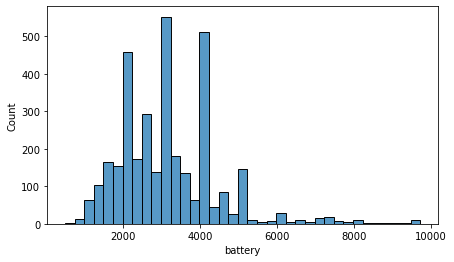

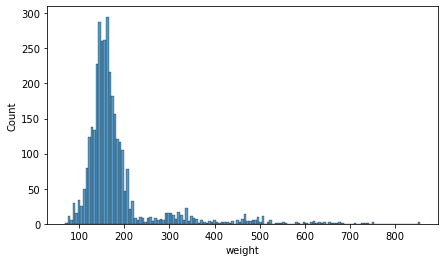

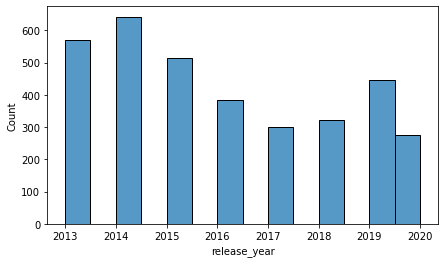

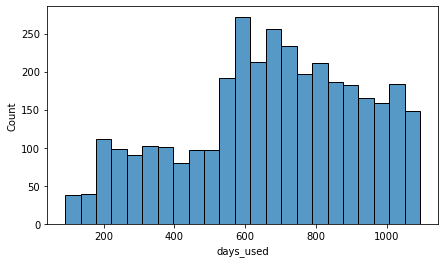

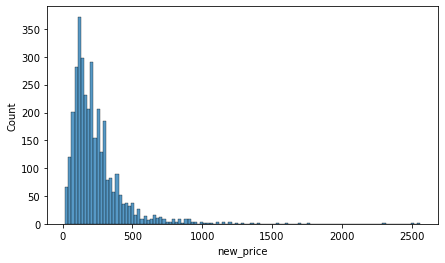

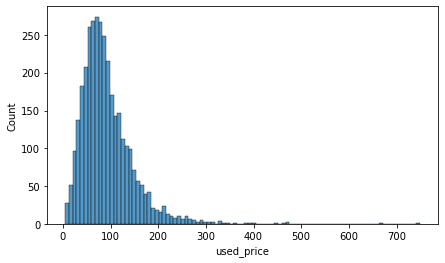

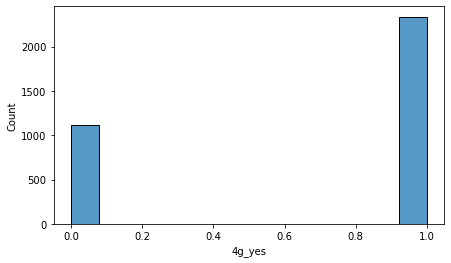

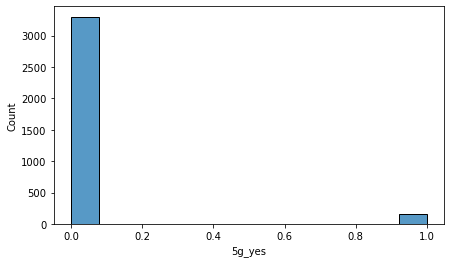

In [71]:
for i in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=i)
    plt.show()

In [72]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [73]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#### Used Price

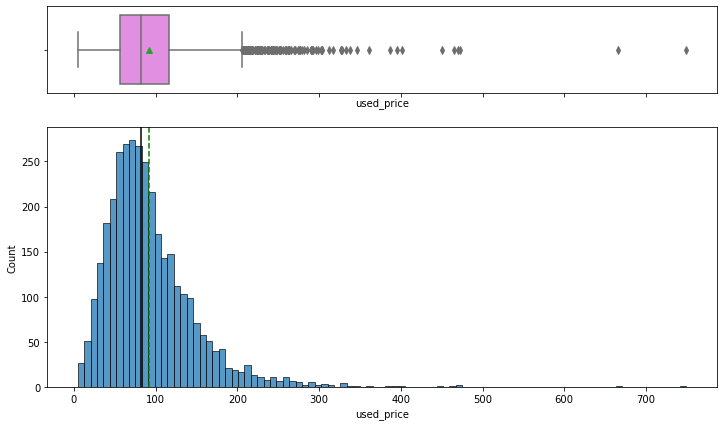

In [74]:
histogram_boxplot(df, "used_price")

In [75]:
df["used_price"].median()

81.87

In [76]:
df["used_price"].mean()

92.30293572669365

#### Observations 
* The distribution of used price is right skewed
* The median used price is 81,87 euros
* The mean used price is 92,30 euros

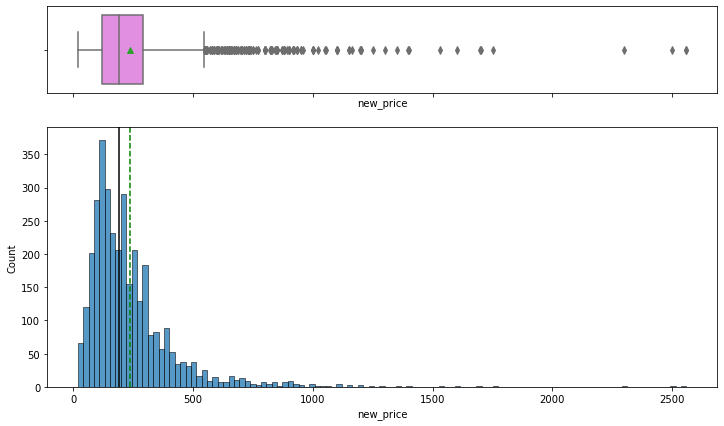

In [77]:
histogram_boxplot(df, "new_price")

In [78]:
df["new_price"].median()

189.78500000000003

In [79]:
df["new_price"].mean()

237.03884771279652

#### Observations 
* The distribution of new price is right-skewed
* The median new price is approximately 189,79 euros 
* The mean new price is approximately 237,04 euros 

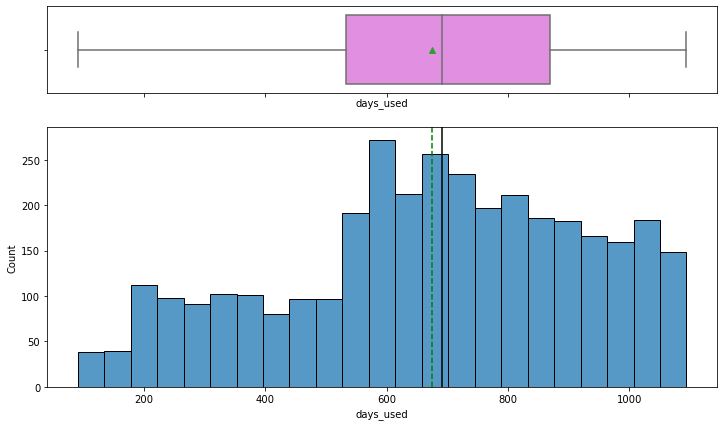

In [80]:
histogram_boxplot(df, "days_used")

In [81]:
df["days_used"].median()

690.5

In [82]:
df["days_used"].mean()

674.8697162709901

#### Observations 
* The distribution of days used is left skewed 
* The median days used is 690.5
* The mean days used is 674.87

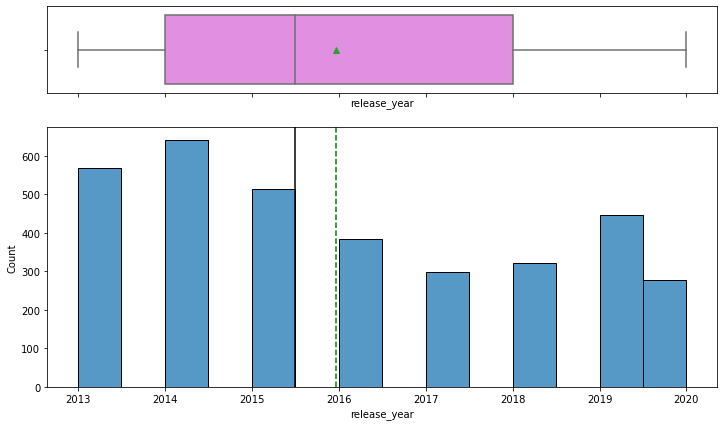

In [84]:
histogram_boxplot(df, "release_year")

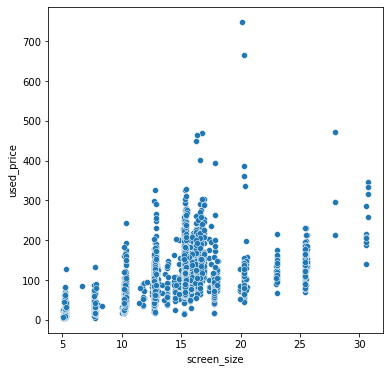

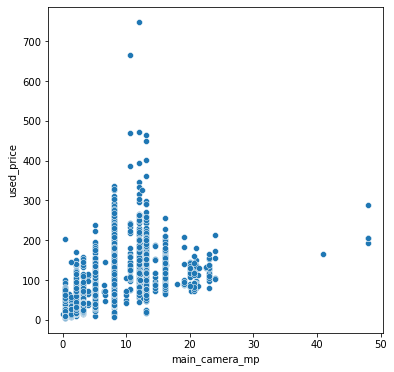

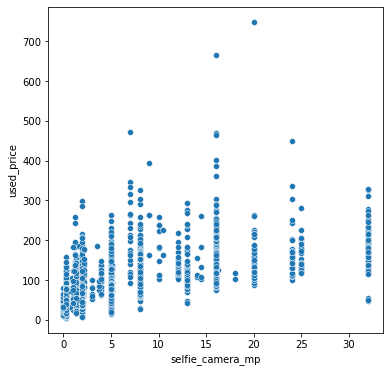

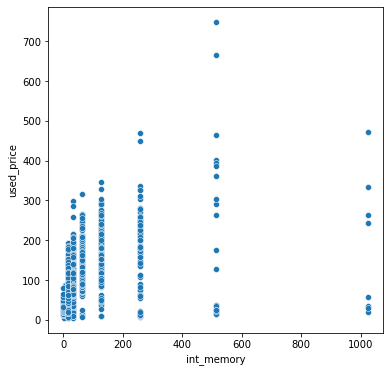

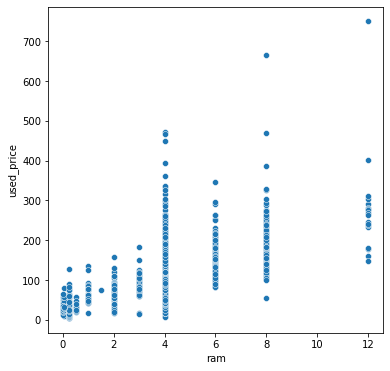

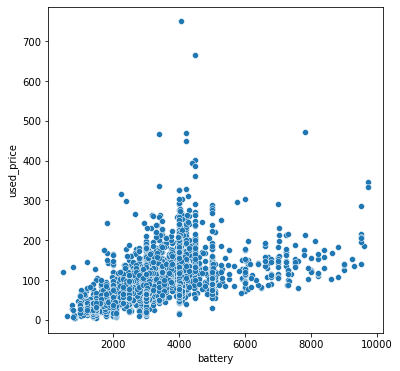

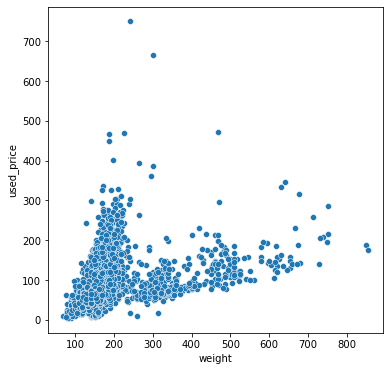

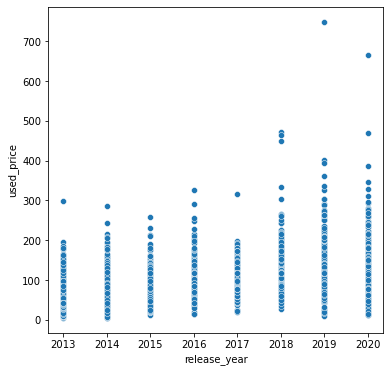

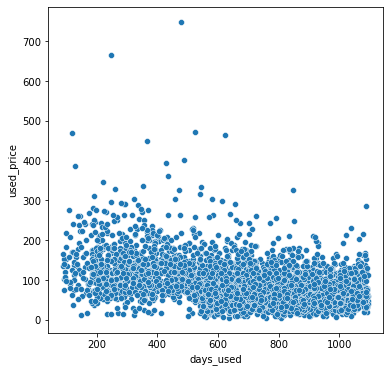

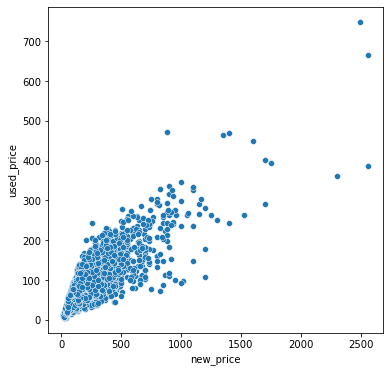

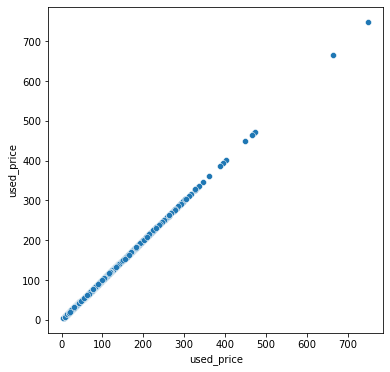

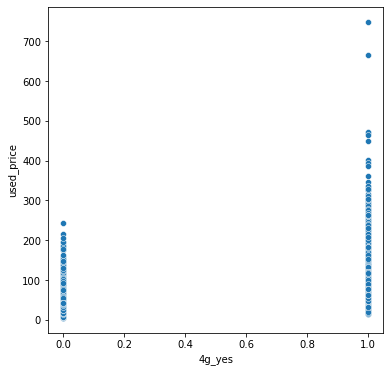

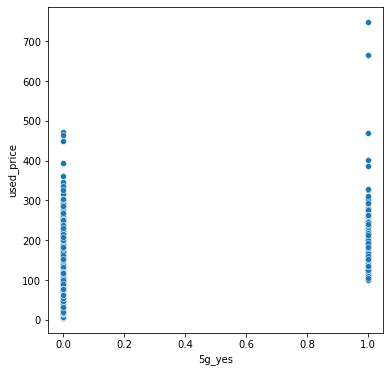

In [85]:
for i in df.columns:
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=df, x=i, y="used_price")
    plt.show()

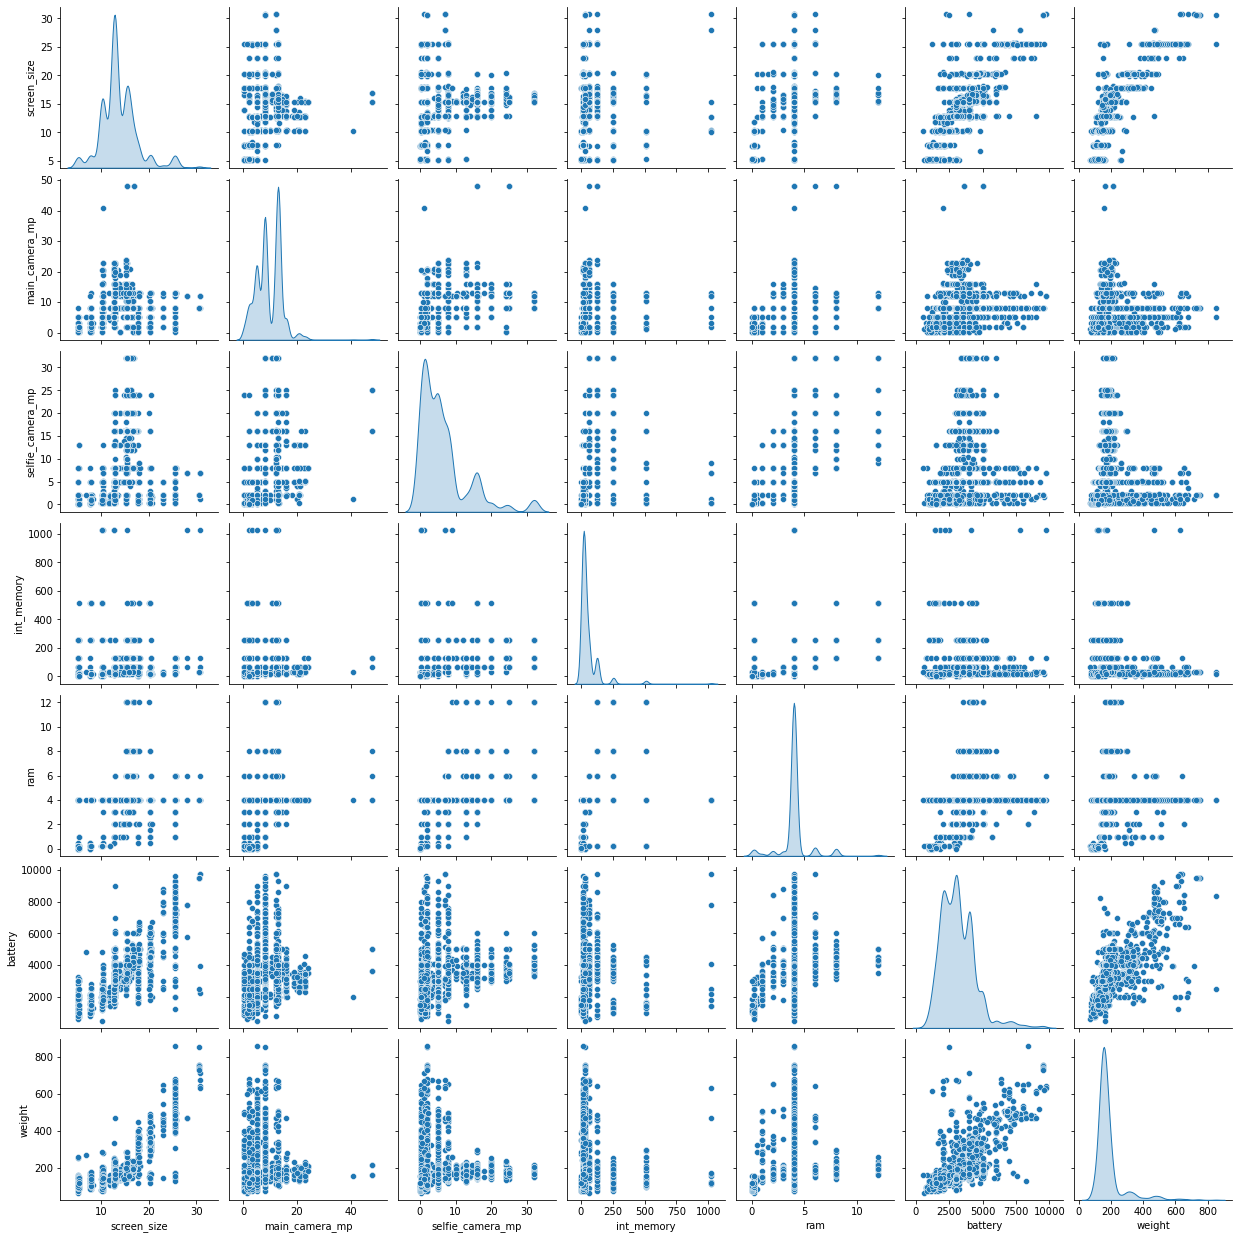

In [86]:
df_attr = df.iloc[:, 0:7]
sns.pairplot(
    df_attr, diag_kind="kde"
)

In [87]:
#correlation of all attributes with used price
df[df.columns[:]].corr()["used_price"][:]

screen_size         0.529275
main_camera_mp      0.419741
selfie_camera_mp    0.613598
int_memory          0.378340
ram                 0.528986
battery             0.549030
weight              0.358130
release_year        0.494910
days_used          -0.385777
new_price           0.809335
used_price          1.000000
4g_yes              0.446738
5g_yes              0.415710
Name: used_price, dtype: float64

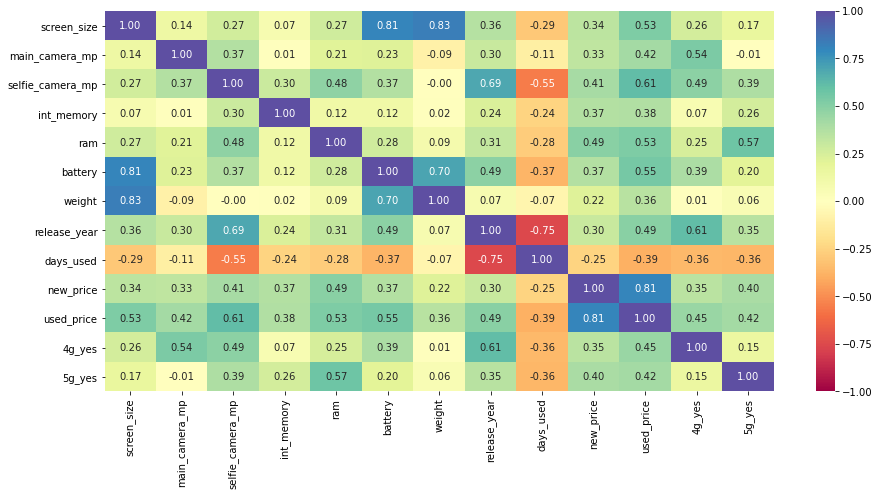

In [88]:
#correlation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(
    df.corr(),
    annot=True,
    vmin=-1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

#### Observations 
* Battery and screen size are highly positively correlated 
* Weight and screen size are highly positively correlated
* Release year and selfie camera are positively correlated
* Weight and battery are positively correlated
* Release year and days used are negatively correlated

## Building a Linear Regression model

### Split Data

In [89]:
#independent variables
X = df.drop(["used_price"], axis=1)
#dependent variable 
y = df[["used_price"]]

In [90]:
#create dummies
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,1,0


In [91]:
#add intercept 
X = sm.add_constant(X)

#### Split X and y into train and test sets in a 70:30 ratio

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [93]:
print(X_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  release_year  days_used  new_price  4g_yes  5g_yes  
3026   1800.0   120.0          2014        819     121.05       0       0  
1525   4050.0   225.0          2016        585     229.20       1       0  
1128   2550.0   162.0          2015        727     170.36       0       0  
3003   3200.0   160.0          2015        800     179.33       1       0  
2907   2900.0   160.0          2017        560     150.84       1       0  


In [94]:
print(X_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866     1.0        15.24            8.00               2.0        16.0  4.00   
957     1.0        10.16            3.15               0.3       512.0  0.25   
280     1.0        15.39            8.00               8.0        32.0  2.00   
2150    1.0        12.83           13.00              16.0        64.0  4.00   
93      1.0        15.29           13.00               5.0        32.0  3.00   

      battery  weight  release_year  days_used  new_price  4g_yes  5g_yes  
866    3000.0   206.0          2014        632     179.61       0       0  
957    1400.0   140.0          2013        637      48.65       0       0  
280    5000.0   185.0          2020        329      88.88       1       0  
2150   3200.0   148.0          2017        648     281.30       1       0  
93     3500.0   179.0          2019        216     200.42       1       0  


### Fit Linear Model

In [95]:
model = sm.OLS(y_train, X_train).fit()

In [96]:
#print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     934.3
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:43:52   Log-Likelihood:                -11040.
No. Observations:                2417   AIC:                         2.211e+04
Df Residuals:                    2404   BIC:                         2.218e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2246.2306    869.121  

### Interpretation of R-Squared
* The R-Squared value tells us that our model can explain 82.3% of the variance in the training set. 

#### Get the value of the coefficient of determination

In [97]:
print("The coefficient of determination (R-squared) is ", model.rsquared)

The coefficient of determination (R-squared) is  0.8234376201223088


#### Get the predicitons on test set 

In [98]:
y_pred=model.predict(X_test)
y_pred.head()

866      72.322897
957      52.870292
280      70.555135
2150    118.317381
93       90.252532
dtype: float64

#### Calculate MSE for training set 

In [99]:
print(
    "The Mean Square Error (MSE) of the model for the training set is ", 
    mean_squared_error(y_train, model.predict(X_train)), 
)

The Mean Square Error (MSE) of the model for the training set is  543.2213407218035


In [100]:
print(
    "The Mean Square Error (MSE) of the model for the training set is", model.mse_resid
)

The Mean Square Error (MSE) of the model for the training set is 546.1588937290347


#### Calculate MSE for test set

In [101]:
print(
    "The Mean Square Error (MSE) of the model for the test set is ", 
    mean_squared_error(y_test, model.predict(X_test)), 
)

The Mean Square Error (MSE) of the model for the test set is  513.233699969512


#### Get the RMSE on training set

In [102]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ", 
    np.sqrt(mean_squared_error(y_train, model.predict(X_train))), 
)

The Root Mean Square Error (RMSE) of the model for the training set is  23.30710923134406


In [103]:
print(
    "The Mean Square Error (MSE) of the model for the training set is ", 
    np.sqrt(model.mse_resid), 
)

The Mean Square Error (MSE) of the model for the training set is  23.370042655695663


#### Get the RMSE on test set 

In [104]:
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ", 
    np.sqrt(mean_squared_error(y_test, model.predict(X_test))), 
)

The Root Mean Square Error (RMSE) of the model for the test set is  22.654661771245053


#### Automate the equation of fit 

In [105]:
# Let us write the equation of linear regression
Equation = "Price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(model.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            "(",
            model.params[i],
            ")*(",
            X_train.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", model.params[i], ")*(", X_train.columns[i], ")")

Price = -2246.2306095747 + ( 1.0264521157948079 )*( screen_size ) + ( 1.605507584403203 )*( main_camera_mp ) + ( 1.8174137505010404 )*( selfie_camera_mp ) + ( 0.0665220697239378 )*( int_memory ) + ( 2.384819108226794 )*( ram ) + ( -0.00047565152603351493 )*( battery ) + ( 0.12433704805448971 )*( weight ) + ( 1.104889229188211 )*( release_year ) + ( 0.0008188848412587224 )*( days_used ) + ( 0.1440729282415411 )*( new_price ) + ( 1.1319773299439722 )*( 4g_yes ) + ( 4.318603976020908 )*( 5g_yes )


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

For Linear Regression, we need to check if the following assumptions hold:-

* Linearity
* Independence
* Homoscedasticity
* Normality of error terms
* No strong Multicollinearity

In [106]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const               3.342857e+06
screen_size         6.043502e+00
main_camera_mp      1.744669e+00
selfie_camera_mp    2.476824e+00
int_memory          1.394609e+00
ram                 1.951629e+00
battery             3.788279e+00
weight              5.667651e+00
release_year        4.327434e+00
days_used           2.570684e+00
new_price           1.896438e+00
4g_yes              2.161232e+00
5g_yes              1.762105e+00
dtype: float64



* The VIF values indicate that the features screen size and weight are correlated with one or more independent features.
* To treat multicollinearity, we will have to drop one or more of the correlated features
* We will drop the variable that has the least impact on the adjusted R-squared of the model. 

#### Screen Size

In [107]:
X_train1 = X_train.drop(["screen_size"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.823 
Adjusted R-squared: 0.822


#### Weight

In [108]:
X_train2 = X_train.drop(["weight"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.816 
Adjusted R-squared: 0.815


#### Since there is no effect on adj. R-squared after dropping the 'screen_size' column, we can remove it from the training set.

In [109]:
X_train = X_train.drop(["screen_size"], axis=1)

In [110]:
olsmod_1 = sm.OLS(y_train, X_train)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1014.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:59:53   Log-Likelihood:                -11046.
No. Observations:                2417   AIC:                         2.212e+04
Df Residuals:                    2405   BIC:                         2.219e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2671.1636    861.806  

#### Let's check if multicollinearity is still present in the data.

In [111]:
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const               3.272688e+06
main_camera_mp      1.704144e+00
selfie_camera_mp    2.471385e+00
int_memory          1.394609e+00
ram                 1.899004e+00
battery             3.526936e+00
weight              2.799932e+00
release_year        4.234339e+00
days_used           2.564550e+00
new_price           1.895745e+00
4g_yes              2.160486e+00
5g_yes              1.754045e+00
dtype: float64



* Let's now drop release_year

In [112]:
X_train = X_train.drop(["release_year"], axis=1)

In [113]:
olsmod_2 = sm.OLS(y_train, X_train)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1110.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:00:44   Log-Likelihood:                -11051.
No. Observations:                2417   AIC:                         2.212e+04
Df Residuals:                    2406   BIC:                         2.219e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -12.0682      2.944  

In [114]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const               38.054981
main_camera_mp       1.703606
selfie_camera_mp     2.215038
int_memory           1.389805
ram                  1.881375
battery              3.338796
weight               2.760414
days_used            1.703381
new_price            1.878016
4g_yes               1.842584
5g_yes               1.735109
dtype: float64



* Now let's drop battery

In [115]:
X_train = X_train.drop(["battery"], axis=1)

In [117]:
olsmod_3 = sm.OLS(y_train, X_train)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1234.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:01:07   Log-Likelihood:                -11051.
No. Observations:                2417   AIC:                         2.212e+04
Df Residuals:                    2407   BIC:                         2.218e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -11.5222      2.888  

In [118]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const               36.623329
main_camera_mp       1.660602
selfie_camera_mp     2.164449
int_memory           1.389495
ram                  1.876986
weight               1.121769
days_used            1.618528
new_price            1.877860
4g_yes               1.713225
5g_yes               1.735097
dtype: float64



* Now let's drop selfie_camera_mp

In [119]:
X_train = X_train.drop(["selfie_camera_mp"], axis=1)

In [120]:
olsmod_4 = sm.OLS(y_train, X_train)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1156.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:01:36   Log-Likelihood:                -11230.
No. Observations:                2417   AIC:                         2.248e+04
Df Residuals:                    2408   BIC:                         2.253e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.1217      3.090     -1.

In [121]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const             36.155565
main_camera_mp     1.589362
int_memory         1.327008
ram                1.744900
weight             1.117768
days_used          1.375161
new_price          1.877797
4g_yes             1.644181
5g_yes             1.729382
dtype: float64



* All VIFs are now below 2

In [122]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_4.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_4.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,59.59,49.778651,9.811349
1,85.49,107.993499,-22.503499
2,74.84,78.039349,-3.199349
3,72.39,73.199266,-0.809266
4,86.18,86.036337,0.143663


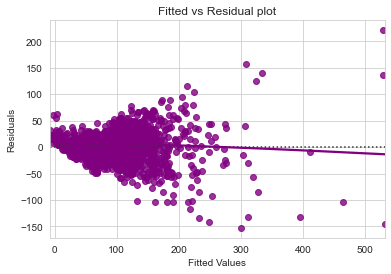

In [123]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [124]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1156.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:01:55   Log-Likelihood:                -11230.
No. Observations:                2417   AIC:                         2.248e+04
Df Residuals:                    2408   BIC:                         2.253e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.1217      3.090     -1.

In [125]:
X_train6 = X_train.drop(["5g_yes"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1317.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:02:05   Log-Likelihood:                -11233.
No. Observations:                2417   AIC:                         2.248e+04
Df Residuals:                    2409   BIC:                         2.253e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.6613      3.085     -1.

In [127]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_6.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_6.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,59.59,49.861038,9.728962
1,85.49,108.090029,-22.600029
2,74.84,77.948648,-3.108648
3,72.39,73.330719,-0.940719
4,86.18,86.108719,0.071281


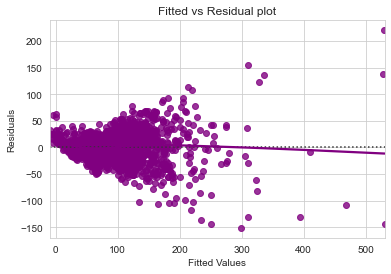

In [128]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### Test of Normality

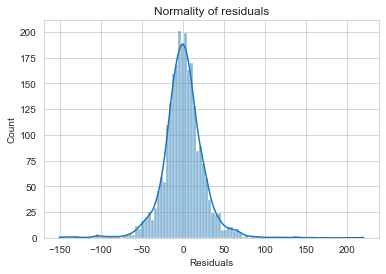

In [129]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

* The residual terms are normally distributed

#### QQ Plot

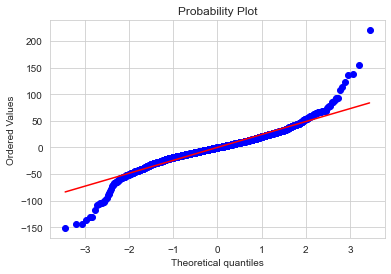

In [130]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* Most of the points are lying on the straight line in QQ plot.

### Test for Homoskedasticity

In [132]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [133]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train6)
lzip(name, test)

[('F statistic', 0.8899764312403743), ('p-value', 0.9782193769733166)]

* Since p-value > 0.05 we can say that the residuals are homoscedastic.

#### All the assumptions of linear regression are now satisfied.

## Final Model Summary

In [134]:
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1317.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:08:16   Log-Likelihood:                -11233.
No. Observations:                2417   AIC:                         2.248e+04
Df Residuals:                    2409   BIC:                         2.253e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.6613      3.085     -1.

### Observations
* R-squared of the model is 0.793 and adjusted R-squared is 0.792, which shows that the model is able to explain ~79% variance in the data. 

* A GB unit increase in ram will cause a 5.5452 unit increase in used phone price, all other variables remaining constant. 

* A used phone having 4g will cause a 8.5995 increase in price, all other variables remaining constant. 

## Actionable Insights and Recommendations

- Android is the main and most popular OS for the market tested 
- Devices running on 5G cost more and are worth more
- Used phones should cost no more than 749,52 euros and no less than 4,65 euros
- Screen size, weight, and battery are all highly correlated elements within device data 
- Samsung is a popular brand among customers, but ReCell should conduct more research within the "Others" category of their data considering it is the most popular response from user responses 